In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.cm as cm

from wordcloud import WordCloud

# Load data
Data has been combined with scores from zero-shot classification (each topic has its own column) and also labels based on clustering (in the column called `label`)

In [2]:
#MARINA FRIDMAN'S CODE
# load clustering results prepared by zero-shot-eda.ipynb
df = pd.read_csv("../data/zero-shot-clustered-articles_2022-02-28_2-7.csv",index_col=0)

zero_shot_cols = df.columns[-41:]

# convert published date to datetime
date_format = '%Y-%m-%dT%H:%M:%S'
df['pub_date_dt'] = pd.to_datetime(df.pub_date, format=date_format)

df["pub_week"] = df.pub_date_dt.dt.strftime('%Y-%W')

# find NTB articles
df['is_ntb'] = df.authors.str.contains('NTB')
df['is_ntb'] = df.is_ntb.fillna(False)

# drop domains
df = df.drop(df[df.domain=="www.bedre-inneklima.no"].index)

df.head()

,url,og_url,domain,title,description_x,content,entities,authors,paywall,fb_total,...,snø,orkan,storm,strømkrise,vindkraft,hav,skred,weather,pub_week,is_ntb
id,,,,,,,,,,,,,,,,,,,,,
y5eVPkYqBbEP,https://www.transportlogistikk.no/gigantbestil...,NaN,www.transportlogistikk.no,Gigantbestilling av elektriske lastebiler - Tr...,DB Schenker inngår et nytt partnerskap med Vol...,DB Schenker inngår et nytt partnerskap med Vol...,"['DB Schenker', 'Volta Trucks', 'Europa']",NaN,NaN,0,...,0.000749,0.001618,0.001852,0.001418,0.008985,0.000765,0.000833,0.002058,2021-48,False
5xe7LwoNwa7r,https://www.kvinnheringen.no/fergerederier-tru...,https://www.kvinnheringen.no/5-27-327032,www.kvinnheringen.no,(+) Fergerederier truer staten med søksmål,Tre fergerederier krever kompensasjon etter in...,"Nyhende, Ferje | Fergerederier truer staten me...",NaN,['Anders Brekke'],1.0,0,...,0.000569,0.001096,0.002512,0.013180,0.003302,0.003384,0.000821,0.003769,2021-48,False
KQe1rng0RaJY,https://www.bygg.no/byggenaeringen-spiller-sto...,https://www.bygg.no/article/1484499!/,www.bygg.no,(+) Byggenæringen spiller stor rolle i regjeri...,Det er nå sju uker siden regjeringen Støre trå...,Det er nå sju uker siden regjeringen Støre trå...,"['Støre', 'SV']",NaN,NaN,36,...,0.000580,0.003242,0.005662,0.009148,0.031548,0.000747,0.001613,0.073525,2021-48,False
YqaQ02YnGenj,https://www.bt.no/btmeninger/debatt/i/g6rROA/f...,NaN,www.bt.no,Debatt: – Flau klimainnsats kan koste Vestland...,Varsellampene bør blinke i alle styrerom langs...,Flau klimainnsats kan koste Vestlandet dyrt «N...,"['Noreg', 'Vestlandet', 'Lars', 'Henrik Paarup...",NaN,NaN,0,...,0.000963,0.065809,0.070236,0.187397,0.194703,0.445930,0.010607,0.351172,2021-48,False
lNbW7lxrQbyg,https://www.eikerbladet.no/kommunen-burde-ga-f...,https://www.eikerbladet.no/5-58-208263,www.eikerbladet.no,– Kommunen burde gå foran som et godt eksempel...,"Hvorfor vil ikke Senterpartiet, Høyre, Venstre...","Hvorfor vil ikke Senterpartiet, Høyre, Venstre...","['Senterpartiet', 'Øvre Eiker', 'SV', 'Oslo', ...",['Kommunestyrerepresentant for Sosialistisk Ve...,NaN,0,...,0.000853,0.001157,0.004009,0.001630,0.002926,0.001034,0.000865,0.004009,2021-48,False


# Visualize clusters

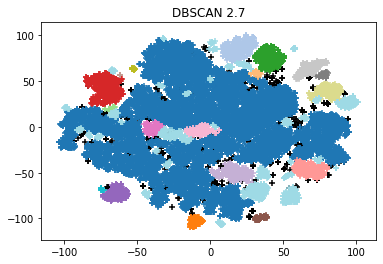

In [3]:
#MARINA FRIDMAN'S CODE
eps_val = 2.7
plt.scatter(df.tsne_1[df.label==-1], df.tsne_2[df.label==-1], color="black", marker="+", label="noise")
for i in range(np.max(df.label+1)):
        if i<20:
                plt.scatter(df.tsne_1[df.label==i], df.tsne_2[df.label==i], color=cm.tab20(i), marker="+", label=i)
        else:
                plt.scatter(df.tsne_1[df.label==i], df.tsne_2[df.label==i], color=cm.tab20(i), marker="+", label=None)
plt.title("DBSCAN %1.1f" % eps_val)
# plt.legend()
plt.show()

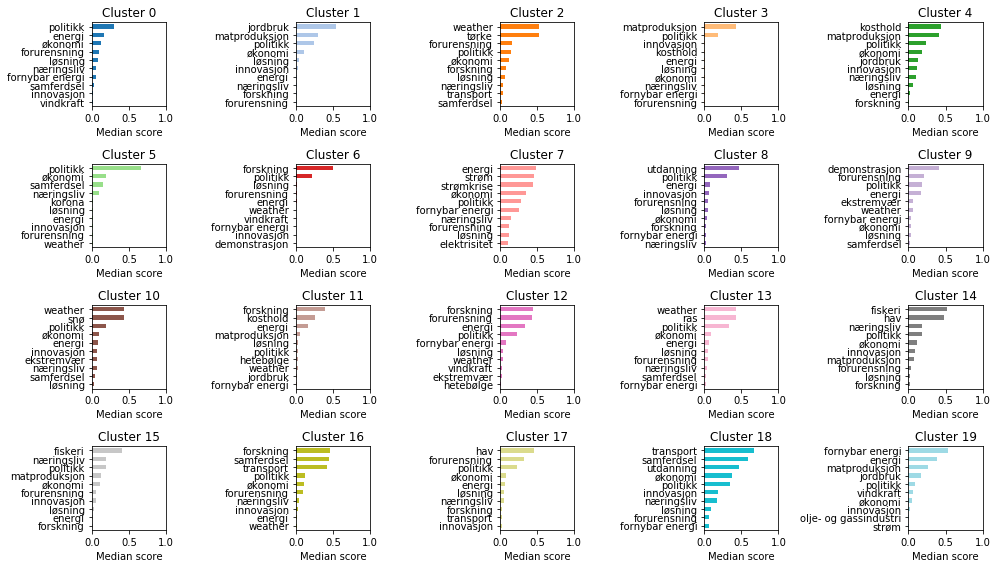

In [4]:
#MARINA FRIDMAN'S CODE
f,ax = plt.subplots(4,5, figsize=(14,8))
for idx, a in enumerate(ax.reshape(-1)):
    df.loc[df.label==idx,zero_shot_cols].median().sort_values().tail(10).plot.barh(ax=a, color=cm.tab20(idx))
    a.set(xlabel="Median score", xlim=[0,1], title="Cluster %d" % idx)
f.tight_layout()

## Make timelines per cluster
This part can be changed to be per label by changing the number of subplots in the figure and looping through the `zero_shot_cols` variable.

For example, changing the first three lines to:
```
thresh = 0.35
f,ax = plt.subplots(8,5, figsize=(14,8))
for id, a in enumerate(ax.reshape(-1)):
    if id < len(ax.reshape(-1)):
        subset = df[df[zero_shot_cols[id]]>thresh]
```

Cluster 0 is about politikk and energi. It has 15278 articles, 11414 stories and 1660 NTB articles
Cluster 1 is about jordbruk and matproduksjon. It has 544 articles, 472 stories and 17 NTB articles
Cluster 2 is about weather and tørke. It has 146 articles, 117 stories and 5 NTB articles
Cluster 3 is about matproduksjon and politikk. It has 44 articles, 34 stories and 4 NTB articles
Cluster 4 is about kosthold and matproduksjon. It has 477 articles, 414 stories and 13 NTB articles
Cluster 5 is about politikk and økonomi. It has 23 articles, 23 stories and 0 NTB articles
Cluster 6 is about forskning and politikk. It has 687 articles, 608 stories and 39 NTB articles
Cluster 7 is about energi and strøm. It has 376 articles, 305 stories and 27 NTB articles
Cluster 8 is about utdanning and politikk. It has 318 articles, 279 stories and 17 NTB articles
Cluster 9 is about demonstrasjon and forurensning. It has 428 articles, 285 stories and 63 NTB articles
Cluster 10 is about weather and snø. 

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 2710.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


Cluster 13 is about weather and ras. It has 225 articles, 205 stories and 3 NTB articles
Cluster 14 is about fiskeri and hav. It has 60 articles, 57 stories and 0 NTB articles
Cluster 15 is about fiskeri and næringsliv. It has 342 articles, 267 stories and 39 NTB articles
Cluster 16 is about forskning and samferdsel. It has 17 articles, 15 stories and 0 NTB articles
Cluster 17 is about hav and forurensning. It has 301 articles, 234 stories and 34 NTB articles
Cluster 18 is about transport and samferdsel. It has 19 articles, 19 stories and 0 NTB articles
Cluster 19 is about fornybar energi and energi. It has 46 articles, 34 stories and 0 NTB articles


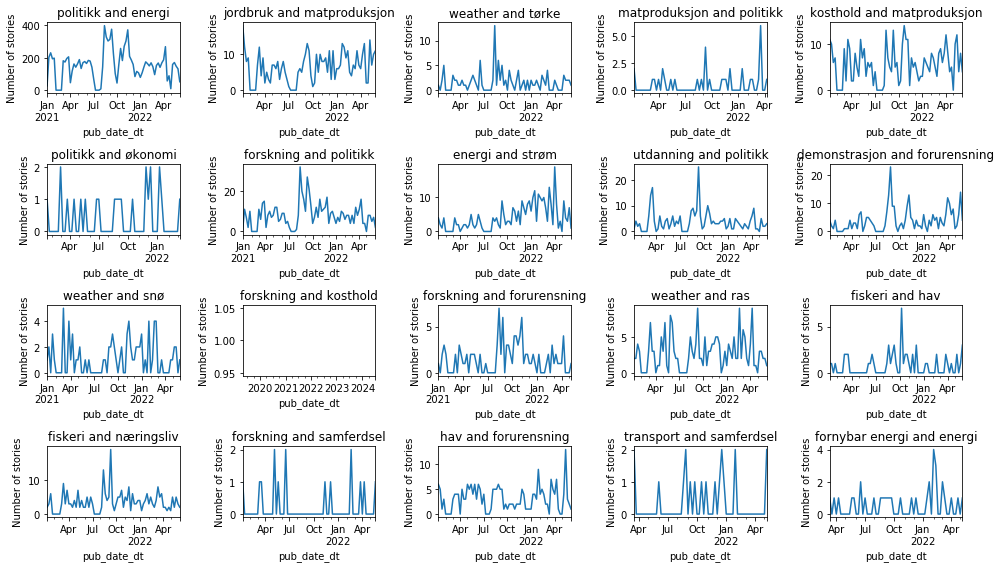

In [5]:
#MARINA FRIDMAN'S CODE
f,ax = plt.subplots(4,5, figsize=(14,8))
for id, a in enumerate(ax.reshape(-1)):
    subset = df[df.label==id]
    topic = subset.loc[:,zero_shot_cols].median().sort_values(ascending=False).head(2).index
    print("Cluster %d is about %s and %s. It has %d articles, %d stories and %d NTB articles" % 
          (id, topic[0], topic[1], subset.shape[0], subset.cluster_id.nunique(), subset.is_ntb.sum()))

    # plot number of unique stories per week
    subset.set_index("pub_date_dt").resample("W").cluster_id.nunique().plot(ax=a)
    a.set(title="%s and %s" % tuple(topic),
           ylabel="Number of stories",
    )

f.tight_layout()

NameError: name 'a2' is not defined

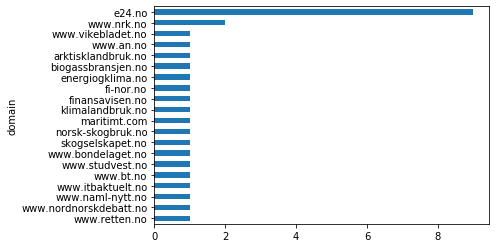

In [6]:
#MARINA FRIDMAN'S CODE
subset.groupby("domain").cluster_id.nunique().sort_values().tail(20).plot.barh()
a2.set(xlabel="Number of stories",
        title="Top publishers in %s and %s" % tuple(topic))

NameError: name 'ax2' is not defined

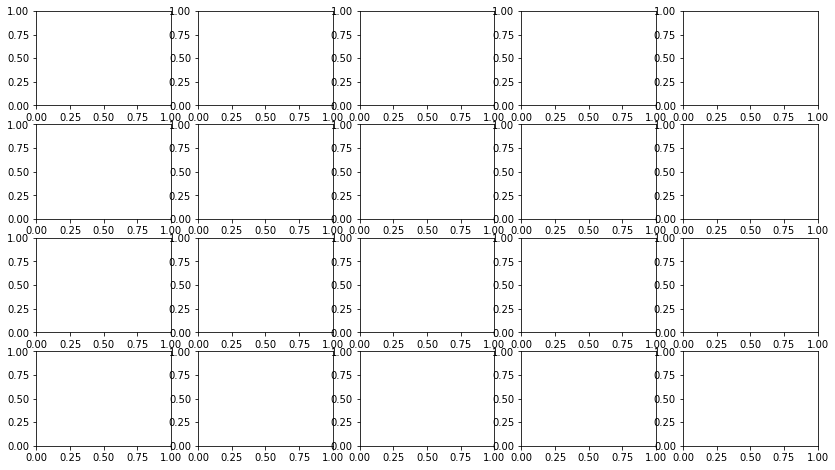

In [8]:
#MARINA FRIDMAN'S CODE
# load stopwords
sw = [line.strip("\n") for line in open("../data/norwegian_stopwords-Copy1.txt", "r")]
sw+=["ikk"]

f,ax = plt.subplots(4,5, figsize=(14,8))
for clust_id, (a, a2) in enumerate(zip(ax.reshape(-1),ax2.reshape(-1))):
    print("Working on cluster %d" % clust_id)
    subset = df[df.label==clust_id]
    topic = subset.loc[:,zero_shot_cols].median().sort_values(ascending=False).head(2).index
   
    # get words from title
    words = subset.title_clean.fillna("").apply(lambda x: [xx for xx in x.split(" ") if xx not in sw])

    words = [word for word in np.concatenate(words.reset_index(drop=True))]

    # combine into a pandas Series, make word count
    word_freq = pd.Series(words).value_counts()
    
    wordcloud = WordCloud(width=400,height=300, 
                      max_words=100,
                      relative_scaling=.6,
                      background_color='white',
                      normalize_plurals=False).generate_from_frequencies(word_freq)

    #plot the wordcloud object
    a.imshow(wordcloud, interpolation='bilInear')
    a.axis('off')
    a.set(title="%s and %s" % tuple(topic))

f.tight_layout()


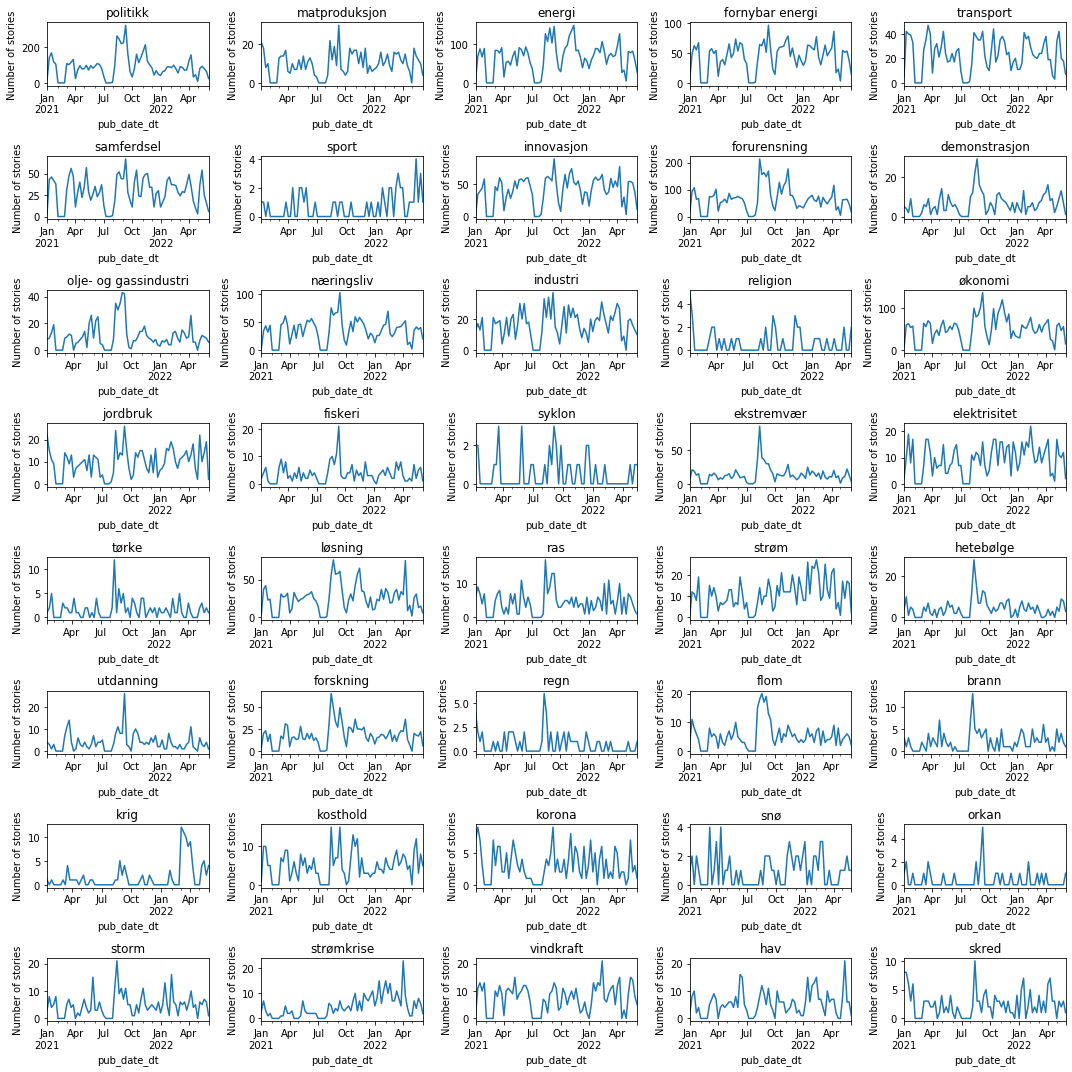

In [65]:
   
    
thresh = 0.35
f,ax = plt.subplots(8,5, figsize=(15,15))
for id, a in enumerate(ax.reshape(-1)): # loop through labels
    if id < len(ax.reshape(-1)):
        subset = df[df[zero_shot_cols[id]]>thresh]
        subset.set_index("pub_date_dt").resample("W").\
            cluster_id.nunique().plot(ax=a)
        a.set(title="%s" % zero_shot_cols[id],
            ylabel="Number of stories",
        )    
    
f.tight_layout() 
#f.savefig('../more_labels_timelines.png')       

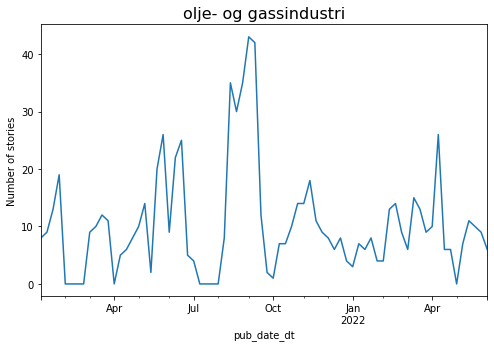

In [27]:
col = "olje- og gassindustri"
subset = df[df[col]>thresh]
f,ax = plt.subplots(figsize=(8, 5))
subset.set_index("pub_date_dt").resample("W").cluster_id.nunique().plot(ax=ax)
ax.set_title("%s" % col, fontsize=16)
ax.set_ylabel("Number of stories")
                                                                        
#f.savefig('../labels_timeline_olje.png', bbox_inches='tight') 
plt.show()

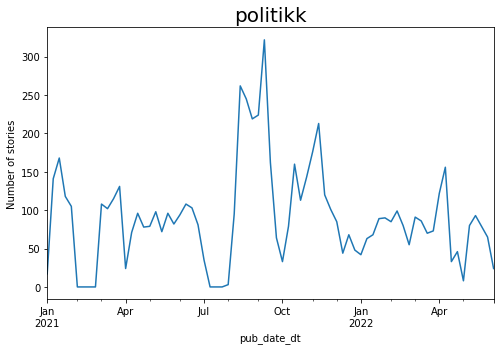

In [32]:
col = "politikk"
subset = df[df[col]>thresh]
f,ax = plt.subplots(figsize=(8, 5))
subset.set_index("pub_date_dt").resample("W").cluster_id.nunique().plot(ax=ax)
ax.set_title("%s" % col, fontsize=20)
ax.set_ylabel("Number of stories")

#f.savefig('../labels_timeline_politikk.png', bbox_inches='tight')
plt.show()

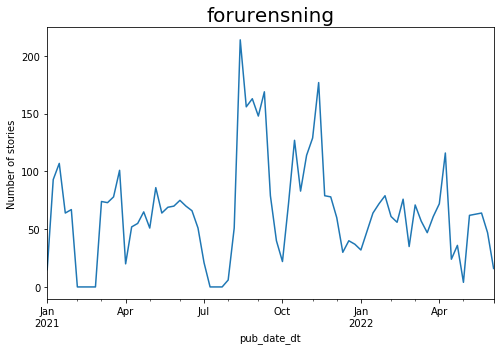

In [34]:
col = "forurensning"
subset = df[df[col]>thresh]
f,ax = plt.subplots(figsize=(8, 5))
subset.set_index("pub_date_dt").resample("W").cluster_id.nunique().plot(ax=ax)
ax.set_title("%s" % col, fontsize=20)
ax.set_ylabel("Number of stories")

#f.savefig('../labels_timeline_forurensning.png', bbox_inches='tight')
plt.show()

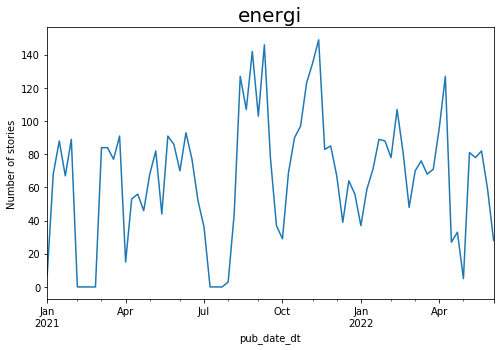

In [36]:
col = "energi"
subset = df[df[col]>thresh]
f,ax = plt.subplots(figsize=(8, 5))
subset.set_index("pub_date_dt").resample("W").cluster_id.nunique().plot(ax=ax)
ax.set_title("%s" % col, fontsize=20)
ax.set_ylabel("Number of stories")

#f.savefig('../labels_timeline_energi.png', bbox_inches='tight')
plt.show()

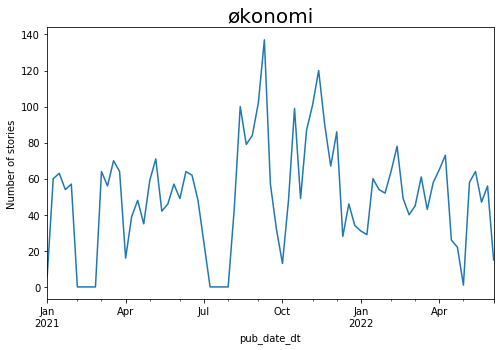

In [38]:
col = "økonomi"
subset = df[df[col]>thresh]
f,ax = plt.subplots(figsize=(8, 5))
subset.set_index("pub_date_dt").resample("W").cluster_id.nunique().plot(ax=ax)
ax.set_title("%s" % col, fontsize=20)
ax.set_ylabel("Number of stories")

#f.savefig('../labels_timeline_økonomi.png', bbox_inches='tight')
plt.show()

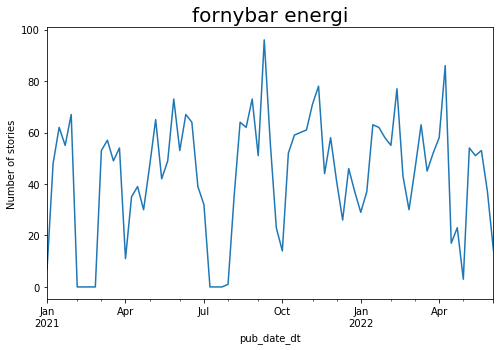

In [40]:
col = "fornybar energi"
subset = df[df[col]>thresh]
f,ax = plt.subplots(figsize=(8, 5))
subset.set_index("pub_date_dt").resample("W").cluster_id.nunique().plot(ax=ax)
ax.set_title("%s" % col, fontsize=20)
ax.set_ylabel("Number of stories")

#f.savefig('../labels_timeline_fornybar.png', bbox_inches='tight')
plt.show()

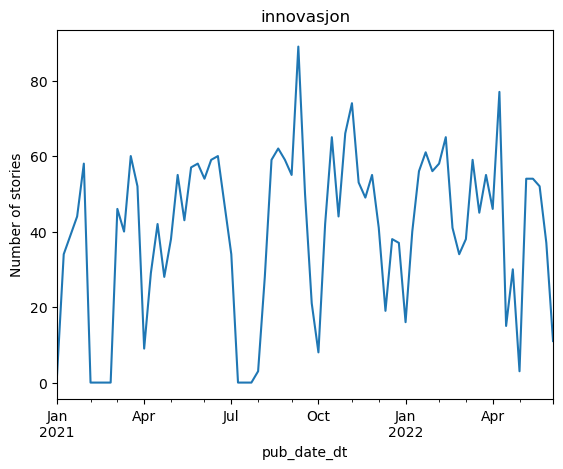

In [71]:
col = "innovasjon"
subset = df[df[col]>thresh]
f,ax = plt.subplots(1)
subset.set_index("pub_date_dt").resample("W").cluster_id.nunique().plot(ax=ax)
ax.set(title="%s" % col,
    ylabel="Number of stories",
)
plt.show()

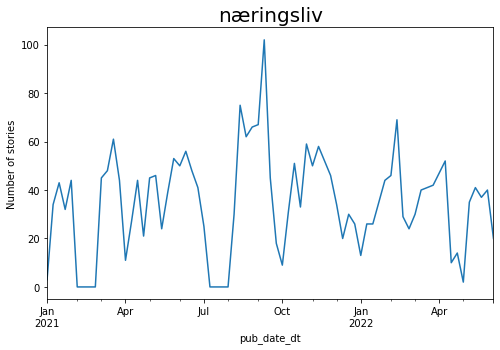

In [42]:
col = "næringsliv"
subset = df[df[col]>thresh]
f,ax = plt.subplots(figsize=(8, 5))
subset.set_index("pub_date_dt").resample("W").cluster_id.nunique().plot(ax=ax)
ax.set_title("%s" % col, fontsize=20)
ax.set_ylabel("Number of stories")

#f.savefig('../labels_timeline_næringsliv.png', bbox_inches='tight')
plt.show()

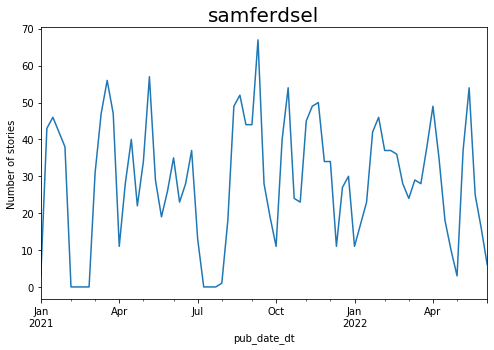

In [44]:
col = "samferdsel"
subset = df[df[col]>thresh]
f,ax = plt.subplots(figsize=(8, 5))
subset.set_index("pub_date_dt").resample("W").cluster_id.nunique().plot(ax=ax)
ax.set_title("%s" % col, fontsize=20)
ax.set_ylabel("Number of stories")

#f.savefig('../labels_timeline_samferdsel.png', bbox_inches='tight')
plt.show()

In [53]:


#thresh = 0.35



#data = df[df[zero_shot_cols[id]]>thresh]
#df1 = pd.DataFrame(data)



In [78]:
import matplotlib.pyplot as plt

zero_shot_cols = df.columns[-41:]

thresh = 0.35

# Filter the DataFrame to only include rows with values above the threshold for zero_shot_cols
df_filtered = df[df[zero_shot_cols] > thresh]

# convert published date to datetime
#date_format = '%Y-%m-%dT%H:%M:%S'
#df['pub_date_dt'] = pd.to_datetime(df.pub_date, format=date_format)

# set the start and end dates
date = '2021-01-08'

# filter the data for the specific day
subset = df_filtered[(df_filtered['pub_date_dt'] == date)] 

# get the most common zero_shot_col for the day
topic = subset.loc[:,zero_shot_cols].median().sort_values(ascending=False).head(1).index

# plot the data
subset.set_index("pub_date_dt")[topic].resample("H").nunique().plot(figsize=(10,5))
plt.xlabel('Hour')
plt.ylabel('Number of stories')
plt.title('Occurrences of %s on %s' % (tuple(topic), start_date))
plt.show()


TypeError: '>' not supported between instances of 'str' and 'float'